In [316]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc("text", usetex=True)
rc("font", family = "serif")
rc("figure",figsize=(9,6))
rc("figure",facecolor="white")
%config InlineBackend.figure_format = 'retina'
import scipy.sparse.linalg as spla
import scipy.sparse as sp
from skimage.transform import resize
%load_ext line_profiler

In [334]:
b = 0.5
h = 1.0
l = 3.
a = np.sqrt(0.25*(l-b)**2-h**2)
N = 101
d = 1./(N-1)
r_edge = N*np.arange(1,N) - 1
l_edge = N*np.arange(1,N)
bottom = np.arange(N)
top = np.arange(N**2-N,N**2)
xi, eta = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
one = np.ones(N**2,dtype=float)

In [335]:
A = (xi**2*a**2 + h**2)/(h**2*(0.5*b+a*eta)**2)
A = A.ravel().reshape(N**2,1)
B = 2*a*xi/(h**2*(0.5*b+a*eta))
B = B.ravel().reshape(N**2,1)
C = 1./h**2
E = 2*a**3*xi/(h**3*(0.5*b+a*eta)**2)
E = E.ravel().reshape(N**2,1)

In [336]:
#Derivatives - Du = Au_xx -Bu_xy + Cu_yy + Eu_x
# u_xx
D = -2.*A*np.diag(np.ones(N**2))
D += A*np.diag(np.ones(N**2-1),1)
D += A*np.diag(np.ones(N**2-1),-1)
D[r_edge,r_edge+1] = 0 #No x_N+1
D[l_edge,l_edge-1] = 0 #No x_-1

#u_yy
D += -2.*C*np.diag(np.ones(N**2))
D += C*np.diag(np.ones(N**2-N),N) 
D += C*np.diag(np.ones(N**2-N),-N)

#u_xy
mixed = -0.25*B*(np.diag(np.ones(N**2-1-N),N+1)+ np.diag(np.ones(N**2-1-N),-N-1))
mixed += 0.25*B*(np.diag(np.ones(N**2-N+1),N-1)+ np.diag(np.ones(N**2-N+1),-N+1))
mixed[l_edge] = 0 #normal derivative along left =0
mixed[top] = 0 #normal derivative along top =0
D += mixed

#u_x
single = 0.5*d*E*(np.diag(np.ones(N**2-1),1) - np.diag(np.ones(N**2-1),-1))
single[l_edge] = 0
single[top] = 0
#Boundary conditions

D[top,top-N] += C #normal derivative along top =0 
D[l_edge,l_edge+1] += A.flatten()[l_edge] #normal derivative along left =0
D[:N,:N] = np.eye(N) #u=0 along bottom
D[r_edge] = np.eye(N**2)[r_edge] #u=0 along right edge
D = sp.csr_matrix(-D/d**2)

In [337]:
u = sp.linalg.spsolve(D, one)
u[:N] = 0
u[r_edge] = 0
u_view = u.reshape(N,N)

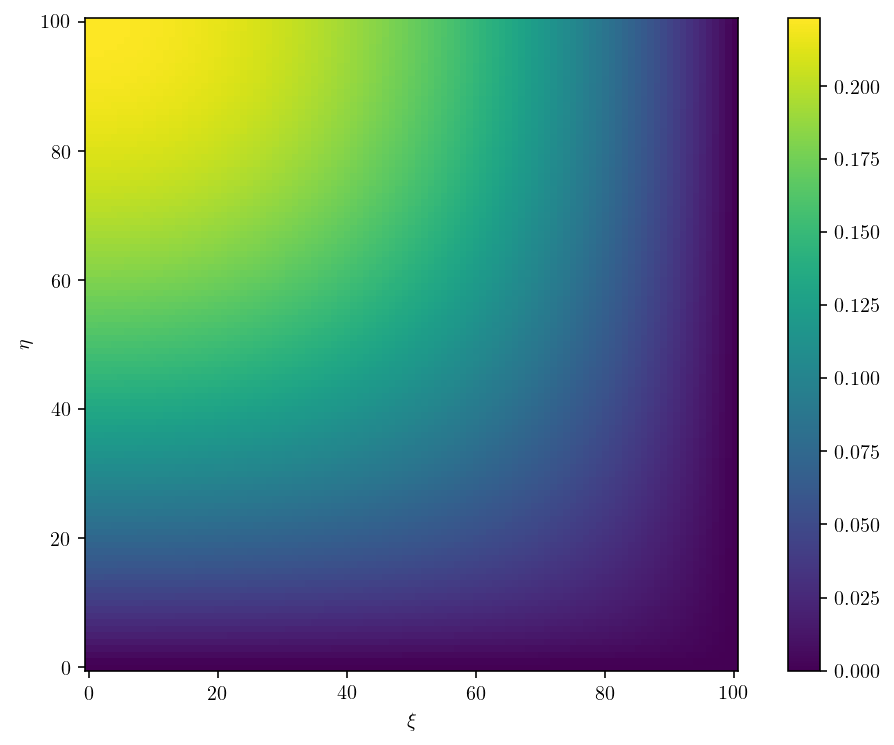

In [338]:
plt.imshow(u.reshape(N,N),origin='lower')
plt.colorbar()
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\eta$")
plt.show()

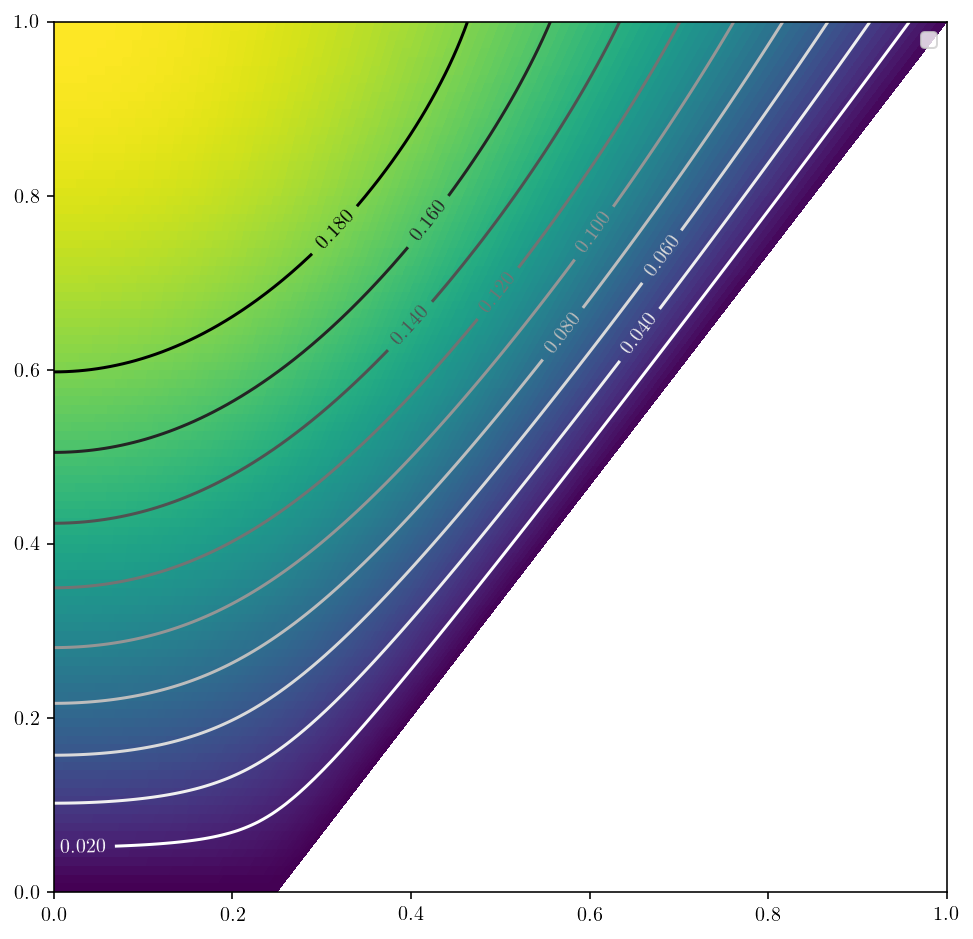

In [339]:
X = 0.5*b*(1+2*a*eta/b)*xi
Y = h*eta
contours = 0.02*np.arange(1,10)
plt.figure(figsize=(8,8))
plt.pcolormesh(X,Y,u_view)
CS = plt.contour(X,Y,u_view,levels=contours,cmap="Greys")
plt.clabel(CS, inline=1, fontsize=10)
plt.legend()
plt.show()

In [298]:
Q = np.sum(u_view)
print Q

1006.7362447804313


In [226]:
idx = np.arange(N**2).reshape(N,N)

In [317]:
%lprun?

Docstring:
Execute a statement under the line-by-line profiler from the
line_profiler module.

Usage:
  %lprun -f func1 -f func2 <statement>

The given statement (which doesn't require quote marks) is run via the
LineProfiler. Profiling is enabled for the functions specified by the -f
options. The statistics will be shown side-by-side with the code through the
pager once the statement has completed.

Options:

-f <function>: LineProfiler only profiles functions and methods it is told
to profile.  This option tells the profiler about these functions. Multiple
-f options may be used. The argument may be any expression that gives
a Python function or method object. However, one must be careful to avoid
spaces that may confuse the option parser. Additionally, functions defined
in the interpreter at the In[] prompt or via %run currently cannot be
displayed.  Write these functions out to a separate file and import them.

-m <module>: Get all the functions/methods in a module

One or more -f 

In [331]:
def all_in_one():
    #Derivatives - Du = Au_xx -Bu_xy + Cu_yy + Eu_x
    # u_xx
    D = -2.*A*np.diag(np.ones(N**2))
    D += A*np.diag(np.ones(N**2-1),1)
    D += A*np.diag(np.ones(N**2-1),-1)
    D[r_edge,r_edge+1] = 0 #No x_N+1
    D[l_edge,l_edge-1] = 0 #No x_-1

    #u_yy
    D += -2.*C*np.diag(np.ones(N**2))
    D += C*np.diag(np.ones(N**2-N),N) 
    D += C*np.diag(np.ones(N**2-N),-N)

    #u_xy
    mixed = -0.25*B*(np.diag(np.ones(N**2-1-N),N+1)+ np.diag(np.ones(N**2-1-N),-N-1))
    mixed += 0.25*B*(np.diag(np.ones(N**2-N+1),N-1)+ np.diag(np.ones(N**2-N+1),-N+1))
    mixed[l_edge] = 0 #normal derivative along left =0
    mixed[top] = 0 #normal derivative along top =0
    D += mixed

    #u_x
    single = 0.5*d*E*(np.diag(np.ones(N**2-1),1) - np.diag(np.ones(N**2-1),-1))
    single[l_edge] = 0
    single[top] = 0
    #Boundary conditions

    D[top,top-N] += C #normal derivative along top =0 
    D[l_edge,l_edge+1] += A.flatten()[l_edge] #normal derivative along left =0
    D[:N,:N] = np.eye(N) #u=0 along bottom
    D[r_edge] = np.eye(N**2)[r_edge] #u=0 along right edge
    D = sp.csr_matrix(-D/d**2)
    u = sp.linalg.spsolve(D, one)
    u[:N] = 0
    u[r_edge] = 0
    u_view = u.reshape(N,N)

In [332]:
%lprun -f all_in_one all_in_one()

Timer unit: 1e-06 s

Total time: 0.010425 s
File: <ipython-input-331-d5983dd43ecb>
Function: all_in_one at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def all_in_one():
     2                                               #Derivatives - Du = Au_xx -Bu_xy + Cu_yy + Eu_x
     3                                               # u_xx
     4         1         1707   1707.0     16.4      D = -2.*A*np.diag(np.ones(N**2))
     5         1         1424   1424.0     13.7      D += A*np.diag(np.ones(N**2-1),1)
     6         1          476    476.0      4.6      D += A*np.diag(np.ones(N**2-1),-1)
     7         1           17     17.0      0.2      D[r_edge,r_edge+1] = 0 #No x_N+1
     8         1            6      6.0      0.1      D[l_edge,l_edge-1] = 0 #No x_-1
     9                                           
    10                                               #u_yy
    11         1          295    295.0      2.8      

Pretty wild that most of the time (>80%) is due to just setting up the D matrix. Might be possible to improve by constructing the sub-components of D as sparse matrices rather than keeping it dense until the very end. 

In [329]:
def diag_test():
    N = 100
    AA = sp.diags((np.arange(N),np.arange(N-1),np.arange(N-1)),(0,1,-1))
    BB = np.diag(np.arange(N))+np.diag(np.arange(N-1),1)+np.diag(np.arange(N-1),-1)
    CC = sp.csr_matrix(BB)

In [330]:
%lprun -f diag_test diag_test()

Timer unit: 1e-06 s

Total time: 0.00117 s
File: <ipython-input-329-9a694716d85e>
Function: diag_test at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def diag_test():
     2         1            3      3.0      0.3      N = 100
     3         1          424    424.0     36.2      AA = sp.diags((np.arange(N),np.arange(N-1),np.arange(N-1)),(0,1,-1))
     4         1          188    188.0     16.1      BB = np.diag(np.arange(N))+np.diag(np.arange(N-1),1)+np.diag(np.arange(N-1),-1)
     5         1          555    555.0     47.4      CC = sp.csr_matrix(BB)

So the dense to sparse conversion is the bottleneck. Hmm... Id have to think even harder about how to initialize the diagonals.